276.8286630392061
线性回归的均方误差 (MSE): 93.09386816639147
岭回归的均方误差 (MSE): 94.33909899035001
最佳的 alpha 值: 276.8286630392061


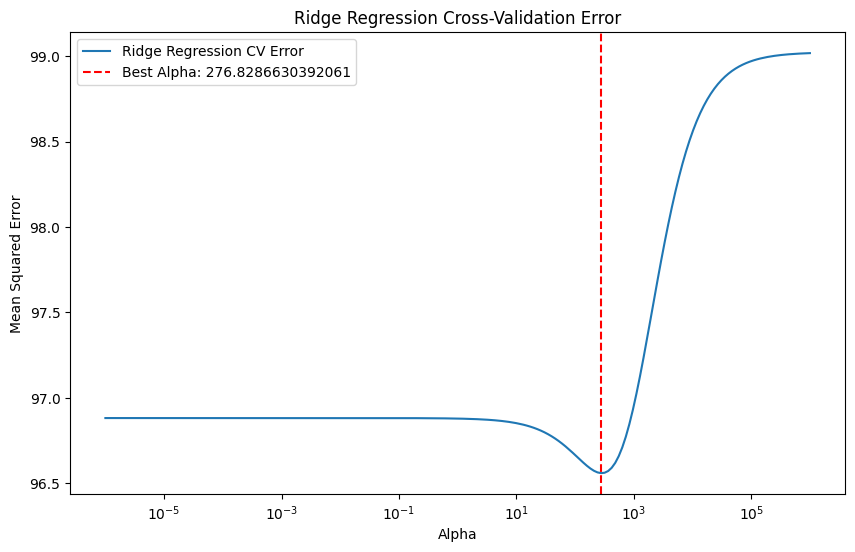

In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# 1. 创建合成数据集
np.random.seed(42)
n_samples = 1000
n_features = 10

# 生成特征
X = np.random.randn(n_samples, n_features)

# 生成目标变量，其中加入多重共线性
true_coefficients = np.random.randn(n_features)
y = X @ true_coefficients + np.random.randn(n_samples) * 10  # 增加噪声

# 2. 拆分数据集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

# 3. 标准化特征
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. 训练线性回归模型
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)

# 5. 训练岭回归模型并选择最佳 alpha
alphas = np.logspace(-6, 6, 200)
ridge_model = RidgeCV(alphas=alphas, store_cv_values=True)
ridge_model.fit(X_train_scaled, y_train)
best_alpha = ridge_model.alpha_
print(best_alpha)
# 6. 预测
y_pred_linear = linear_model.predict(X_test_scaled)
y_pred_ridge = ridge_model.predict(X_test_scaled)

# 7. 计算均方误差
mse_linear = mean_squared_error(y_test, y_pred_linear)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)

# 8. 输出结果
print(f"线性回归的均方误差 (MSE): {mse_linear}")
print(f"岭回归的均方误差 (MSE): {mse_ridge}")
print(f"最佳的 alpha 值: {best_alpha}")

# 9. 绘制结果
plt.figure(figsize=(10, 6))
plt.plot(alphas, np.mean(ridge_model.cv_values_, axis=0), label='Ridge Regression CV Error')
plt.axvline(best_alpha, linestyle='--', color='r', label=f'Best Alpha: {best_alpha}')
plt.xlabel('Alpha')
plt.ylabel('Mean Squared Error')
plt.xscale('log')
plt.legend()
plt.title('Ridge Regression Cross-Validation Error')
plt.show()
